In [ ]:
Q1. How can you create a Bokeh plot using Python code?

In [ ]:
pip install bokeh#Step 1: Install Bokeh

import bokeh.io
import bokeh.plotting
bokeh.io.output_notebook()
from bokeh.plotting import figure, show#Step 2: Import the Required Libraries
from bokeh.io import output_file

# Sample data
x = [1, 2, 3, 4, 5]
y = [2, 3, 5, 7, 11]
#Step 3: Prepare Your Data

# Output to an HTML file
output_file("line_plot.html")

# Create a figure
p = figure(title="Simple Line Plot", x_axis_label='X-axis', y_axis_label='Y-axis')

# Add a line renderer with legend and line thickness
p.line(x, y, legend_label="Line", line_width=2)
#Step 4: Create a Bokeh Plots

#Step 5: Display the Plot
# Show the plot
show(p)


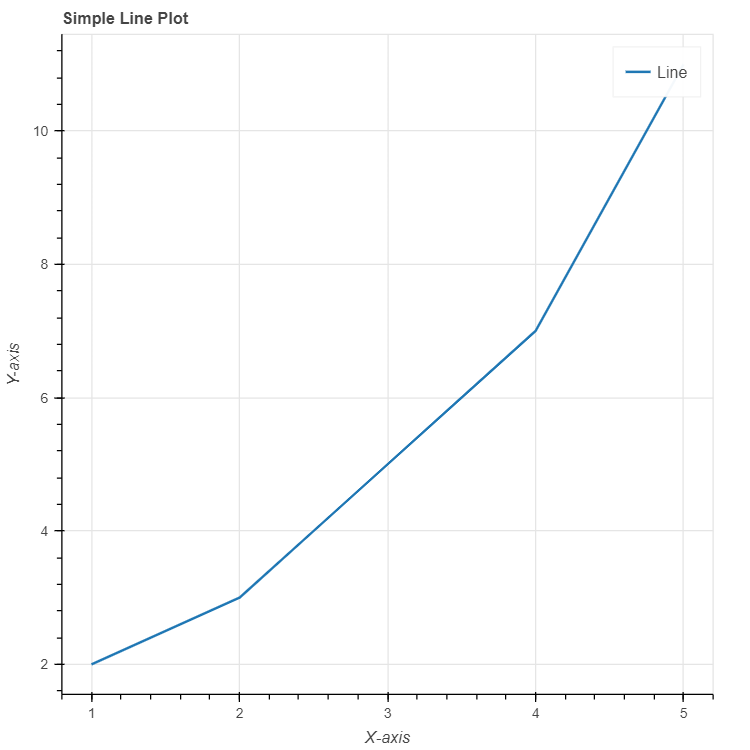

In [ ]:
Q2. What are glyphs in Bokeh, and how can you add them to a Bokeh plot? Explain with an example.

In [ ]:
Glyphs are the visual representations of data points in a Bokeh plot, defining how data is displayed. Common glyphs include circles, squares, lines, and bars.


In [ ]:
# Step 1: Install Bokeh
!pip install bokeh

# Step 2: Import Libraries
import bokeh.io
import bokeh.plotting

bokeh.io.output_notebook()  # Display Bokeh plots inline

# Step 3: Prepare Your Data and Create the Plot
# Sample data
x = [1, 2, 3, 4, 5]
y = [2, 3, 5, 7, 11]
sizes = [10, 20, 30, 40, 50]
colors = ['red', 'green', 'blue', 'orange', 'purple']

# Create a figure
p = bokeh.plotting.figure(title="Bokeh Glyphs Example", x_axis_label='X-axis', y_axis_label='Y-axis')

# Add circle glyphs using scatter
p.scatter(x, y, size=sizes, color=colors, fill_alpha=0.6, legend_label="Circles")

# Add line glyph
p.line(x, y, line_width=2, color='black', legend_label="Line")

# Add square glyphs using scatter
p.scatter(x, [i + 0.5 for i in y], size=10, marker='square', color="navy", legend_label="Squares")

# Step 4: Show the plot inline
bokeh.plotting.show(p)



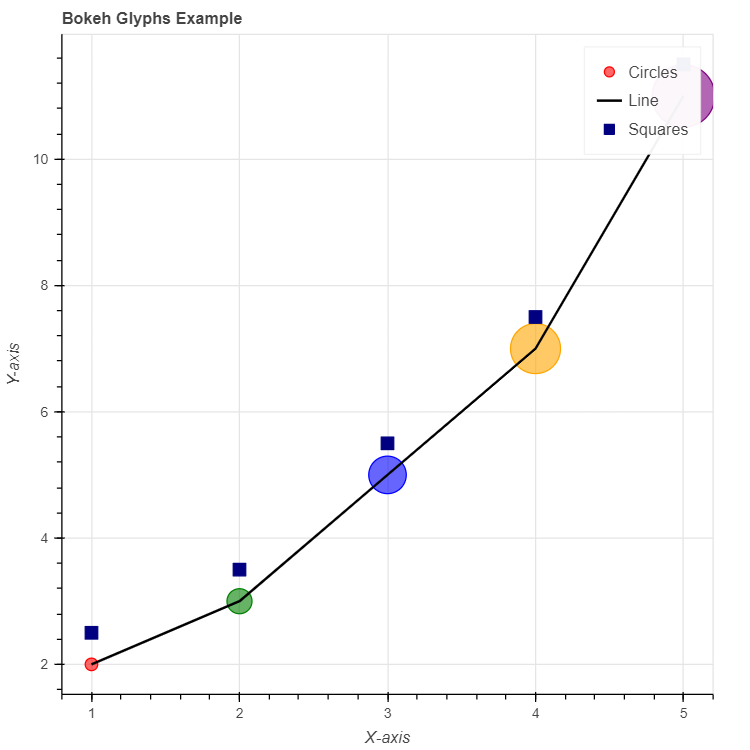

In [ ]:
Q3. How can you customize the appearance of a Bokeh plot, including the axes, title, and legend?

In [ ]:
1.Title Customization:

Use title to set the main title of the plot.
Use title_text_font_size, title_text_color, and title_location for additional styling.

2Axis Customization:

Use x_axis_label and y_axis_label to set axis labels.
Customize the font size and color with properties like axis_label_text_font_size and axis_label_text_color.
Use axis_label_standoff to set space between the axis label and axis itself.
Control tick labels using major_label_orientation, major_label_text_font_size, and major_label_text_color.

3.Legend Customization:

Use legend_label when adding glyphs to set the legend text.
Customize the legend position with legend_location.
Adjust the font size and other properties with legend_label_text_font_size and legend_location.

In [ ]:
Q4. What is a Bokeh server, and how can you use it to create interactive plots that can be updated in
real time?

In [ ]:
The Bokeh server is a component of the Bokeh library that allows you to create interactive visualizations and web applications that can be updated in real time. 

In [ ]:
import numpy as np
from bokeh.io import output_notebook, show
from bokeh.layouts import column
from bokeh.models import ColumnDataSource, Slider
from bokeh.plotting import figure

# Prepare the output to display in the notebook
output_notebook()

# Create a ColumnDataSource for data
x = np.linspace(0, 10, 100)  # x values
y = np.sin(x)  # initial y values (sine wave)
source = ColumnDataSource(data=dict(x=x, y=y))

# Create a figure
p = figure(title="Real-Time Sine Wave", x_axis_label='X', y_axis_label='Y', width=600, height=400)
p.line('x', 'y', source=source, line_width=2)

# Create a slider to adjust frequency
slider = Slider(start=1, end=10, value=1, step=0.1, title="Frequency")

# Callback function to update the plot based on the slider
def update_plot(attr, old, new):
    frequency = slider.value  # Get the new frequency from the slider
    new_y = np.sin(frequency * x)  # Update y values based on the frequency
    source.data = dict(x=x, y=new_y)  # Update the data source

# Attach the update function to the slider
slider.on_change('value', update_plot)

# Layout the plot and slider
layout = column(slider, p)

# Show the plot
show(layout)


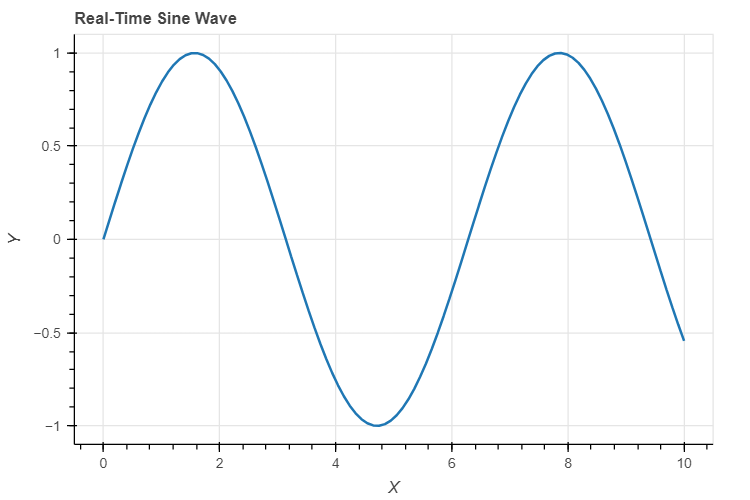

In [ ]:
Q5. How can you embed a Bokeh plot into a web page or dashboard using Flask or Django?

In [ ]:
1.SInstall Flask and Bokeh: If you haven't already, install Flask and Bokeh:

pip install Flask bokeh

2.Create a Flask App: Create a Flask app with a route that renders an HTML template. You'll need to generate the Bokeh plot and convert it to HTML using the components function.

from flask import Flask, render_template
from bokeh.plotting import figure
from bokeh.embed import components

app = Flask(__name__)

@app.route('/')
def index():
    # Create a Bokeh plot
    p = figure(title="My Bokeh Plot", x_axis_label='X-axis', y_axis_label='Y-axis')
    # Add glyphs and customize the plot here

    # Convert plot to HTML components
    script, div = components(p)
    return render_template('index.html', script=script, div=div)

if __name__ == '__main__':
    app.run(debug=True)
    
3.Create HTML Template: Create an HTML template (e.g., templates/index.html) that includes the Bokeh plot components using Jinja2 templating.

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Bokeh Plot in Flask</title>
    {{ script|safe }}
</head>
<body>
    <h1>Embedded Bokeh Plot</h1>
    {{ div|safe }}
</body>
</html>